In [1]:
import pandas as pd
import numpy as np
import seaborn as so
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

In [2]:
CountriesDataFrame = pd.read_csv('Country-data.csv')
CountriesDataFrame

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
CountriesDataFrame.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
CountriesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
CountriesDataFrame.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
CountriesDataFrame.nlargest(10, 'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


In [7]:
CountriesDataFrame.nsmallest(10, 'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800


In [8]:
CountriesDataFrame.nlargest(10, 'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


In [9]:
CountriesDataFrame.nsmallest(10, 'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [10]:
CountriesDataFrame.nlargest(10, 'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [11]:
CountriesDataFrame.nsmallest(10, 'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


C:\Users\andre\AppData\Local\Temp\ipykernel_21196\3386011186.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  so.heatmap(CountriesDataFrame.corr(), center=0, annot=True, fmt='.2f', square=True, cmap=cmap)


<AxesSubplot: >

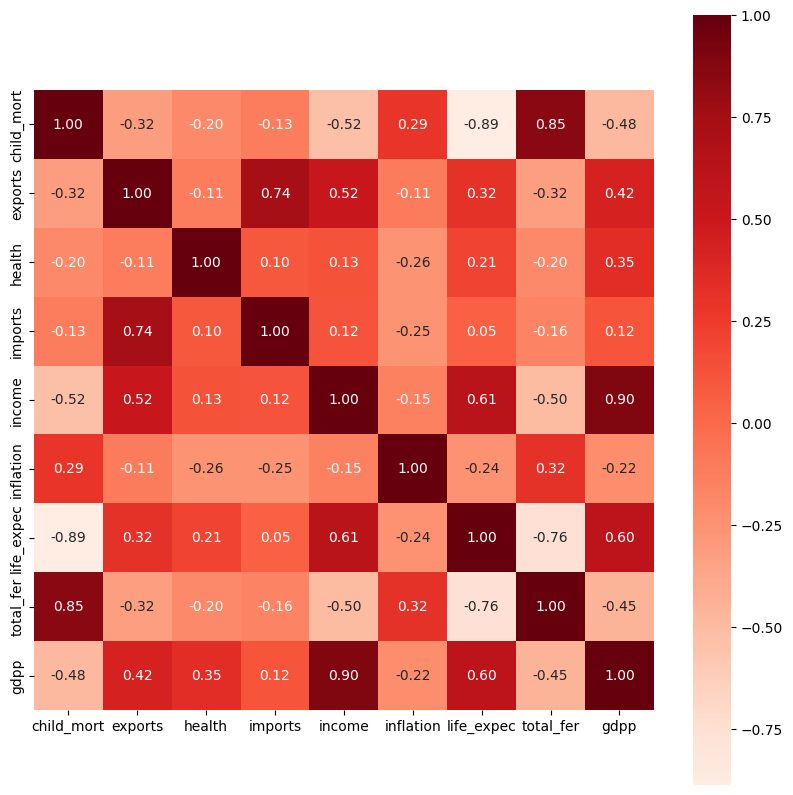

In [12]:
plt.figure(figsize=(10, 10))
cmap = so.color_palette("Reds", as_cmap=True)
so.heatmap(CountriesDataFrame.corr(), center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

<AxesSubplot: xlabel='health'>

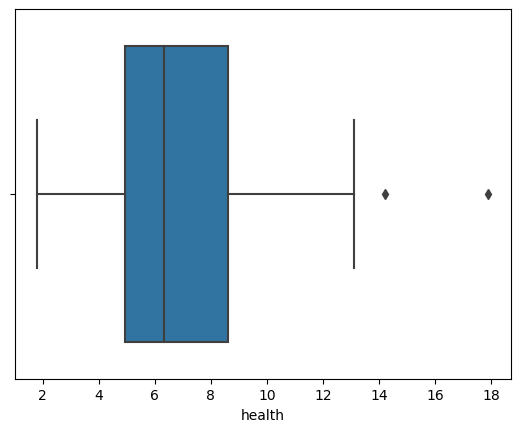

In [13]:
so.boxplot(x=CountriesDataFrame['health'])

<AxesSubplot: xlabel='child_mort'>

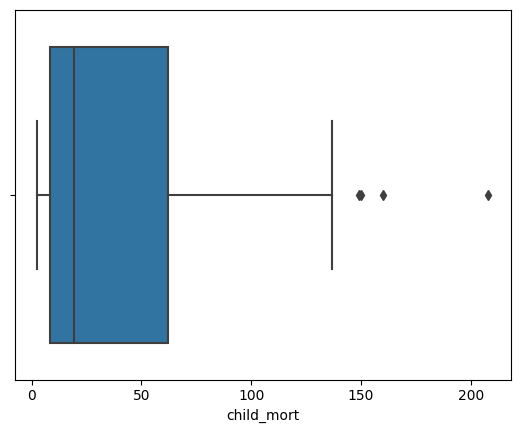

In [14]:
so.boxplot(x=CountriesDataFrame['child_mort'])

<AxesSubplot: xlabel='income'>

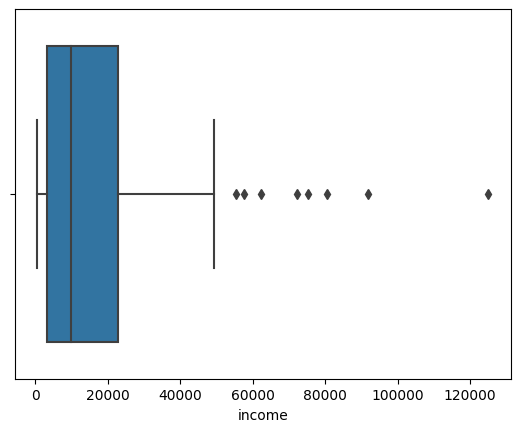

In [15]:
so.boxplot(x=CountriesDataFrame['income'])

<AxesSubplot: xlabel='gdpp'>

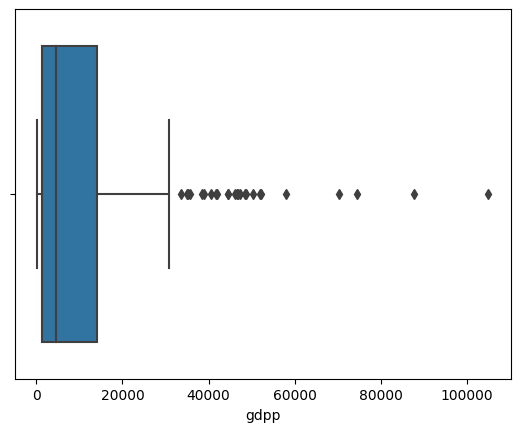

In [16]:
so.boxplot(x=CountriesDataFrame['gdpp'])

<AxesSubplot: xlabel='gdpp', ylabel='Count'>

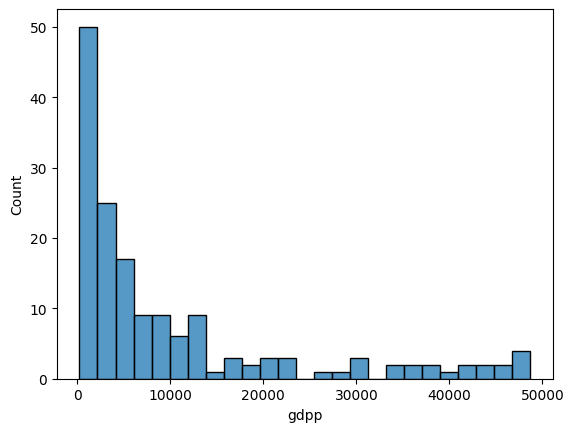

In [17]:
so.histplot(data=CountriesDataFrame[CountriesDataFrame['gdpp'] < 50000], x="gdpp", bins = 25)

<AxesSubplot: xlabel='inflation', ylabel='Count'>

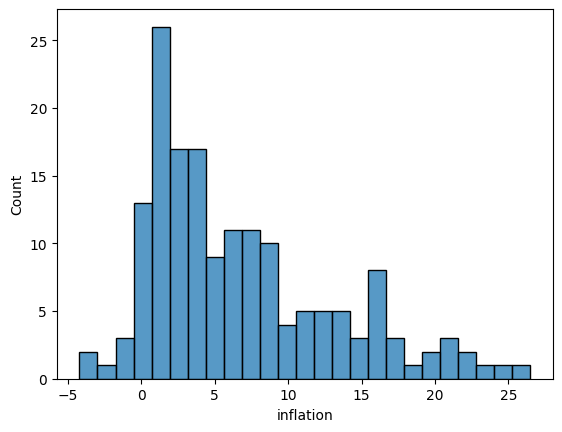

In [18]:
so.histplot(data=CountriesDataFrame[CountriesDataFrame['inflation']<30], x="inflation", bins = 25)

<AxesSubplot: xlabel='child_mort', ylabel='total_fer'>

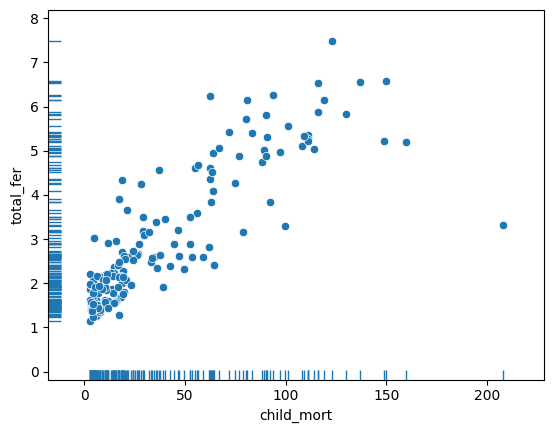

In [19]:
so.scatterplot(data = CountriesDataFrame, x = "child_mort", y = "total_fer")
so.rugplot(data = CountriesDataFrame, x = "child_mort", y = "total_fer")


<AxesSubplot: xlabel='life_expec', ylabel='gdpp'>

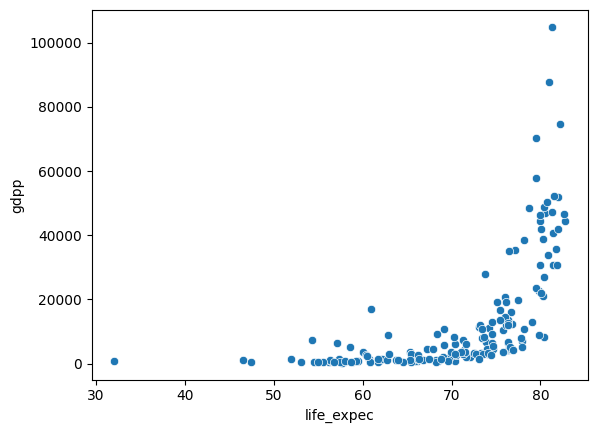

In [20]:
so.scatterplot(data=CountriesDataFrame, x="life_expec", y="gdpp")

<AxesSubplot: xlabel='income', ylabel='gdpp'>

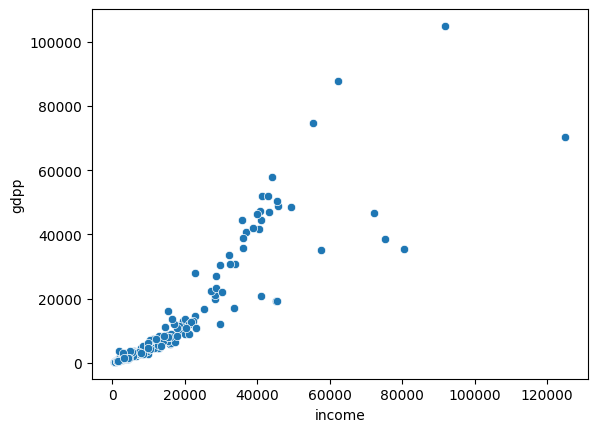

In [21]:
so.scatterplot(data=CountriesDataFrame, x="income", y="gdpp")

<AxesSubplot: xlabel='exports', ylabel='imports'>

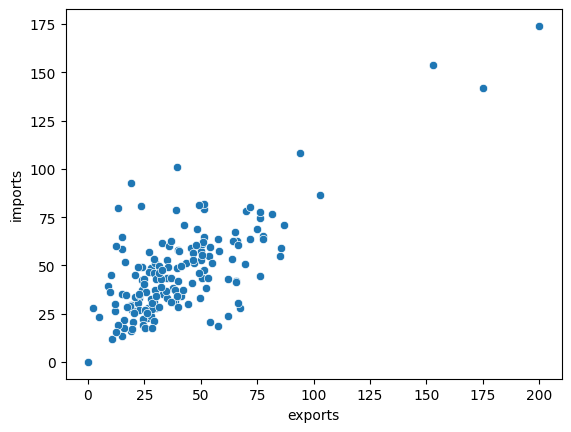

In [22]:
so.scatterplot(data=CountriesDataFrame, x="exports", y="imports")

<AxesSubplot: xlabel='gdpp'>

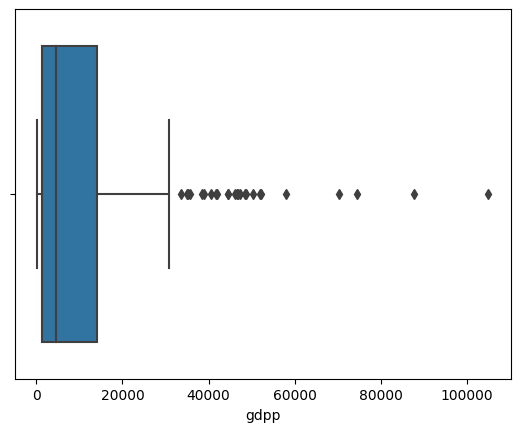

In [23]:
so.boxplot(x=CountriesDataFrame['gdpp'])

<AxesSubplot: xlabel='child_mort'>

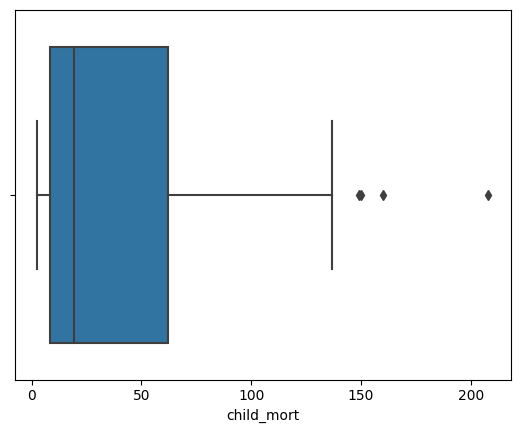

In [24]:
so.boxplot(x=CountriesDataFrame['child_mort'])

<AxesSubplot: xlabel='income'>

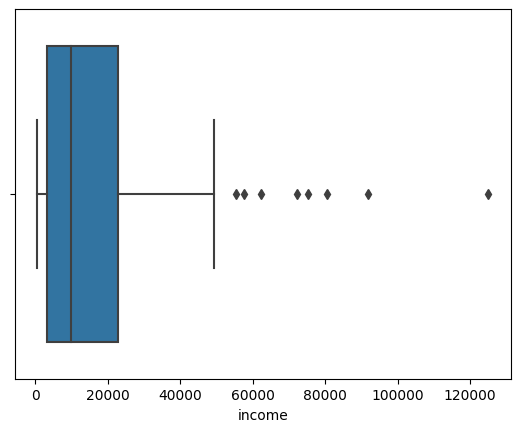

In [25]:
so.boxplot(x=CountriesDataFrame['income'])

In [26]:
ClearedDF = CountriesDataFrame[CountriesDataFrame['gdpp'] < 37000]
ClearedDF = CountriesDataFrame[CountriesDataFrame['child_mort'] < 140]
ClearedDF = CountriesDataFrame[CountriesDataFrame['income'] < 50000]

In [27]:
ClearedDF.nlargest(10, 'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700


C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

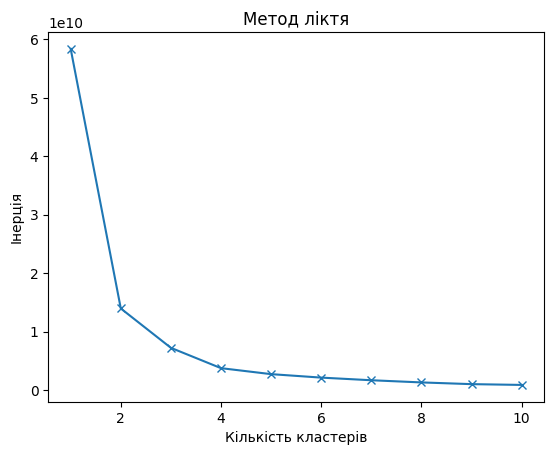

In [55]:
klaster = list(zip(ClearedDF["gdpp"], ClearedDF["income"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klaster)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='x')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


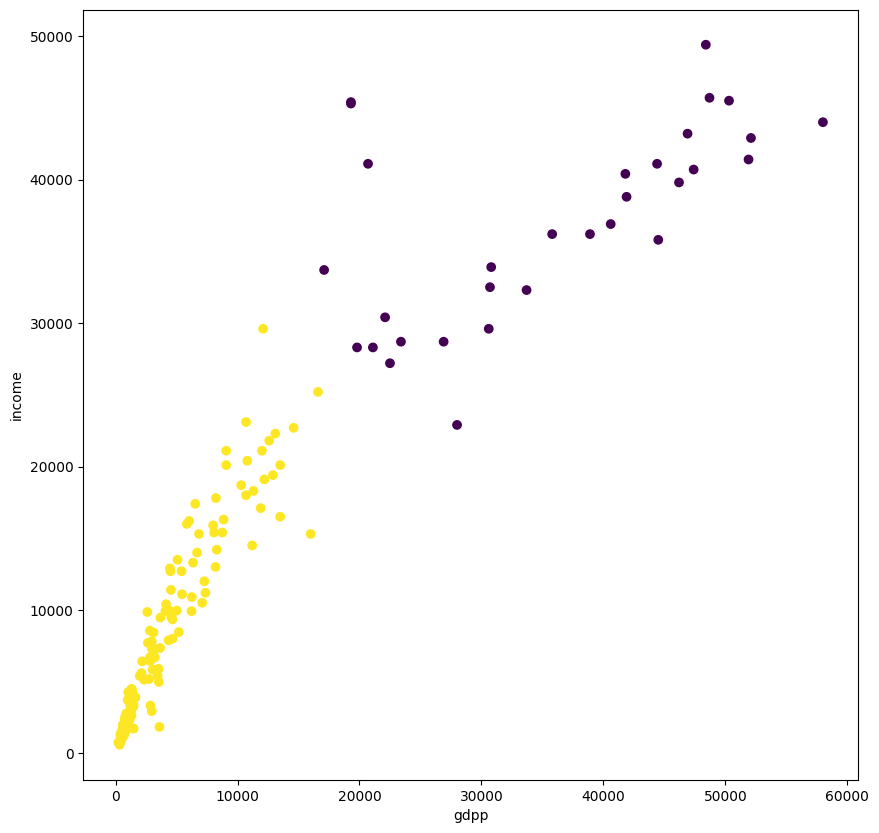

In [56]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(klaster)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(ClearedDF["gdpp"], ClearedDF["income"], c=kmeans.labels_)
ax.set_xlabel('gdpp')
ax.set_ylabel('income')
plt.show()

In [30]:
ClearedDF.nsmallest(8, ['income', 'gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648


C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

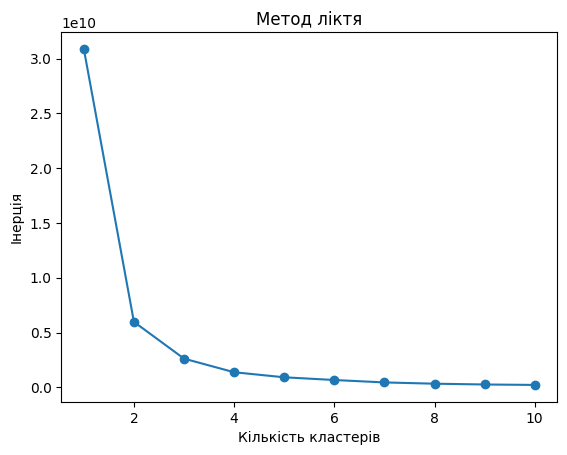

In [57]:
klaster2 = list(zip(ClearedDF["gdpp"], ClearedDF["child_mort"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klaster2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

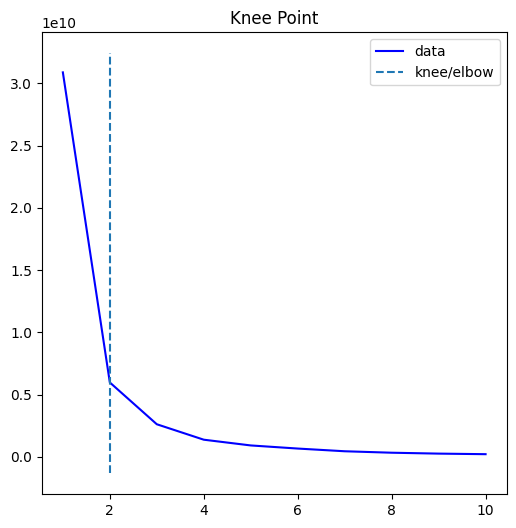

In [32]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
kl.plot_knee()

C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


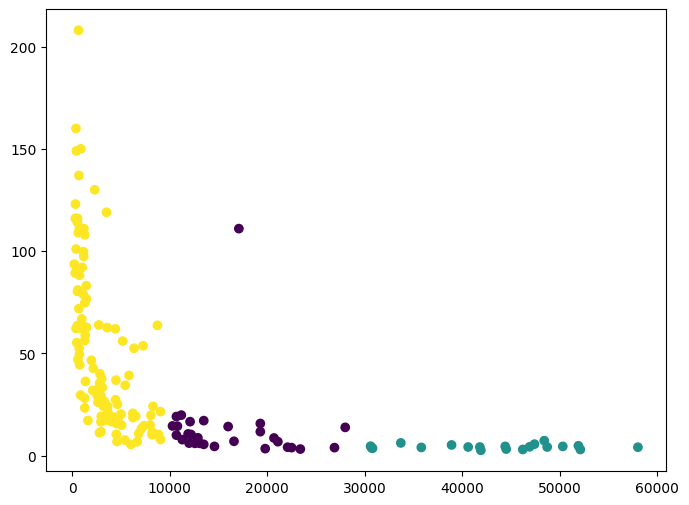

In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(klst2)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(ClearedDF["gdpp"], ClearedDF["child_mort"], c=kmeans.labels_)
plt.show()

C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'income')

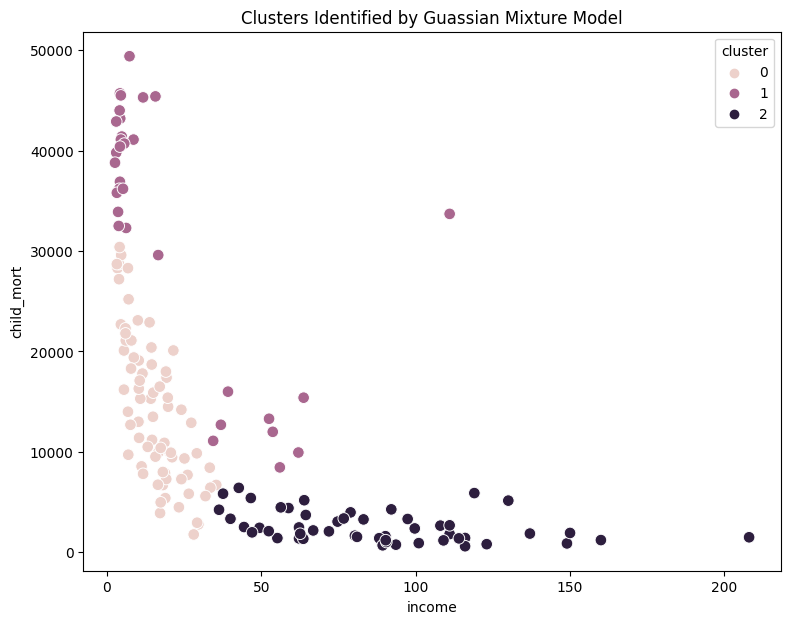

In [58]:
Clr = ClearedDF[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(Clr)
cluster_labels = gmm_model.predict(Clr)
Clr = pd.DataFrame(Clr)
Clr['cluster'] = cluster_labels

fig, ax = plt.subplots(figsize=(9, 7))
so.scatterplot(x='child_mort', y='income', data=Clr, hue='cluster', s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')

In [59]:
BD = ClearedDF[["country"]]
BD=pd.merge(BD,Clr, left_index=True,right_index=True)
BD.nsmallest(5, ['income', 'child_mort'])

,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.0,609,2
88,Liberia,89.3,700,2
26,Burundi,93.6,764,2
112,Niger,123.0,814,2
31,Central African Republic,149.0,888,2


In [60]:
BD['cluster'].value_counts(normalize=True)


0    0.471698
2    0.327044
1    0.201258
Name: cluster, dtype: float64

In [61]:
Cluster_child_mort=pd.DataFrame(Clr.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(Clr.groupby(["cluster"]).income.mean())
Cmi = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
Cmi.columns = ["child_mort","income"]
Cmi



,child_mort,income
cluster,,
0,15.728000,14137.200000
1,20.134375,32834.375000
2,86.826923,2541.788462


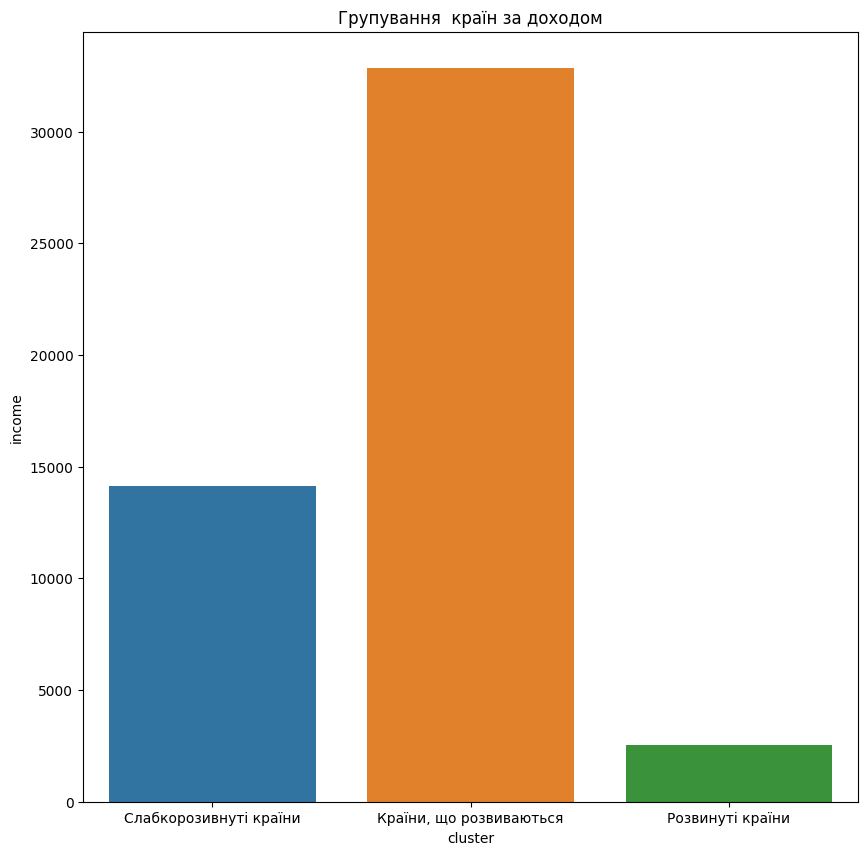

In [62]:
fig = plt.figure(figsize = (10,10))
Cmi.rename(index={2: 'Розвинуті країни'},inplace=True)
Cmi.rename(index={1: 'Країни, що розвиваються'},inplace=True)
Cmi.rename(index={0: 'Слабкорозивнуті країни'},inplace=True)
s=so.barplot(x=Cmi.index,y='income',data=Cmi)
plt.title('Групування  країн за доходом')
plt.show()

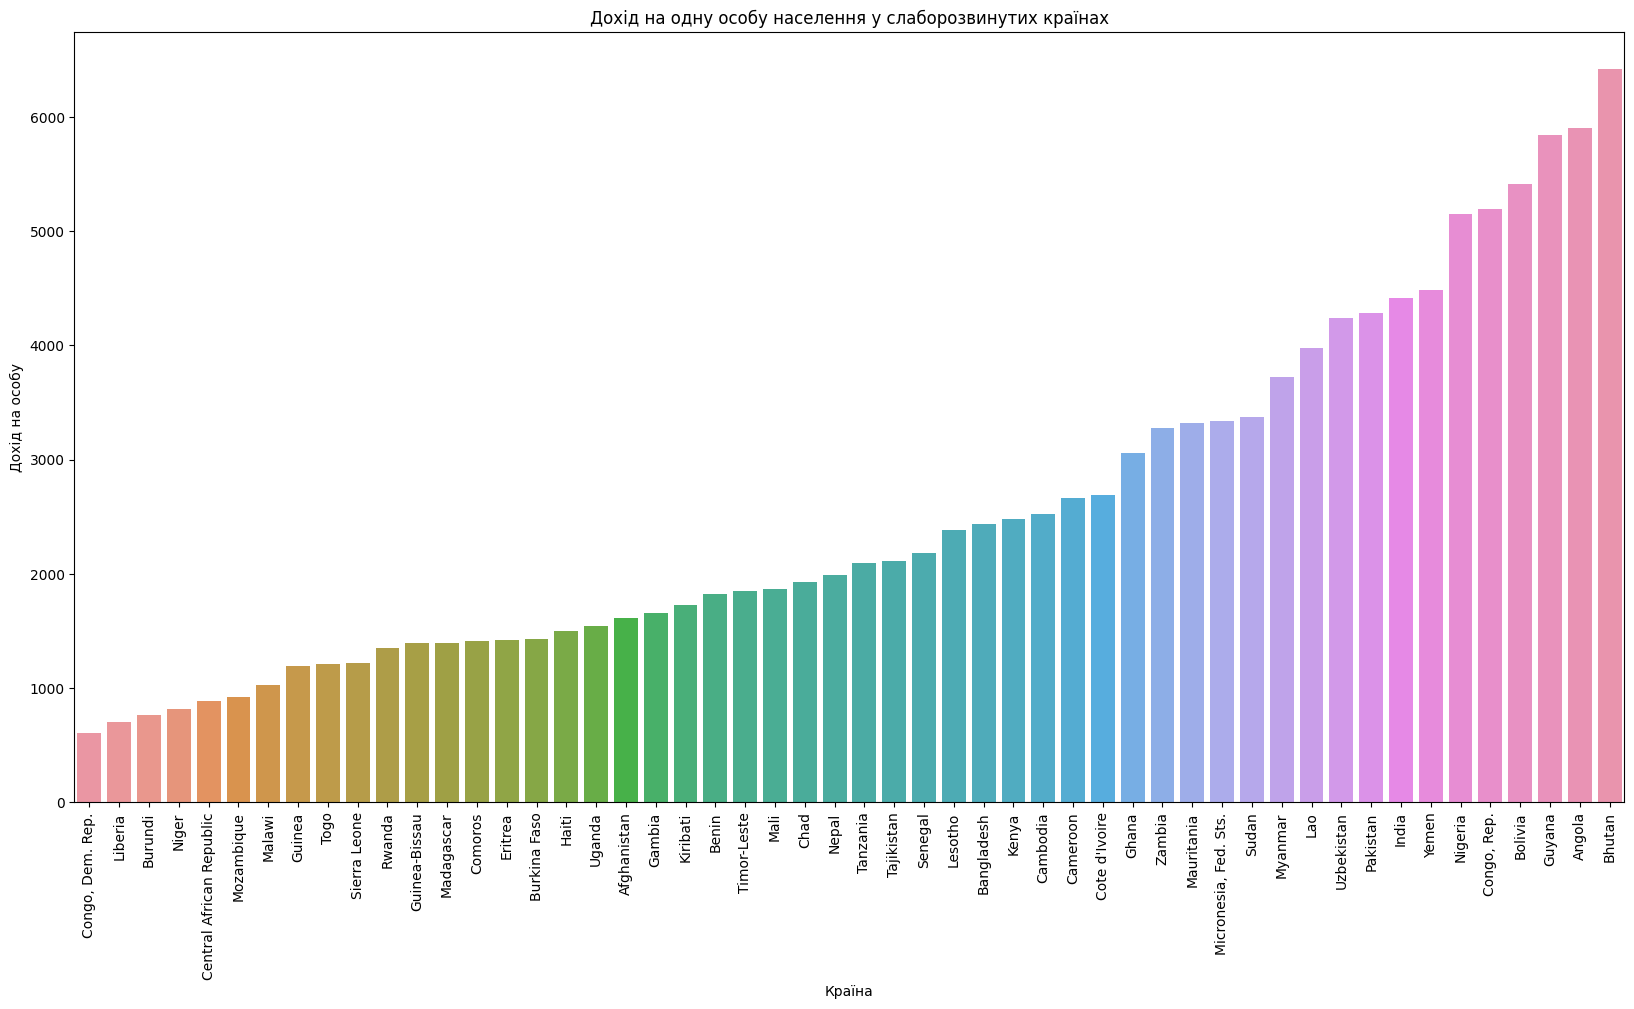

In [63]:
GC=BD[BD['cluster']==2]
NC=BD[BD['cluster']==1]
BD=BD[BD['cluster']==0]
BD=BD.sort_values(by = 'income')

fig = plt.figure(figsize = (20,10))
s=so.barplot(x='country',y='income',data=badCon)
plt.xticks(rotation = 90)
plt.title('Дохід на одну особу населення у слаборозвинутих країнах')
plt.xlabel('Країна')
plt.ylabel('Дохід на особу')
plt.show()